In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


load the dataset




In [3]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Fill null values in 'Age'
titanic_df['Age'].fillna(titanic_df['Age'].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [8]:
# Fill null values in 'Cabin'
titanic_df['Cabin'].fillna('Unknown')

,Cabin
0,Unknown
1,C85
2,Unknown
3,C123
4,Unknown
...,...
886,Unknown
887,B42
888,Unknown
889,C148


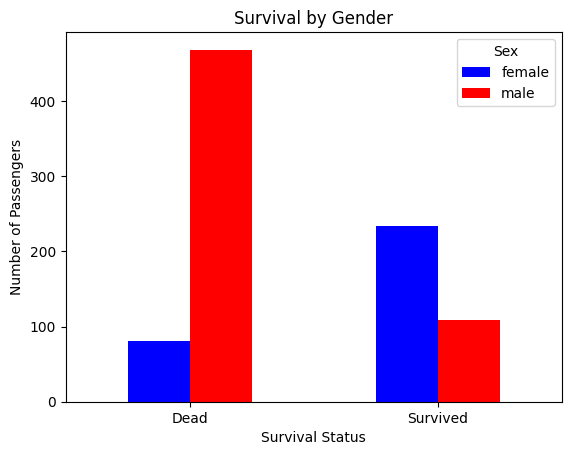

In [9]:
titanic_df['survival_status'] = titanic_df['Survived'].map({0 : 'Dead', 1 : 'Survived'})
p_survived = titanic_df.groupby(['survival_status', 'Sex']).size().unstack(fill_value=0)
#p_survived = titanic_df.groupby(['Survived', 'Sex']).size().unstack(fill_value=0)

p_survived.plot(kind='bar', color=['blue', 'red'])

plt.title('Survival by Gender')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['Dead', 'Survived'], rotation=0)

plt.show()

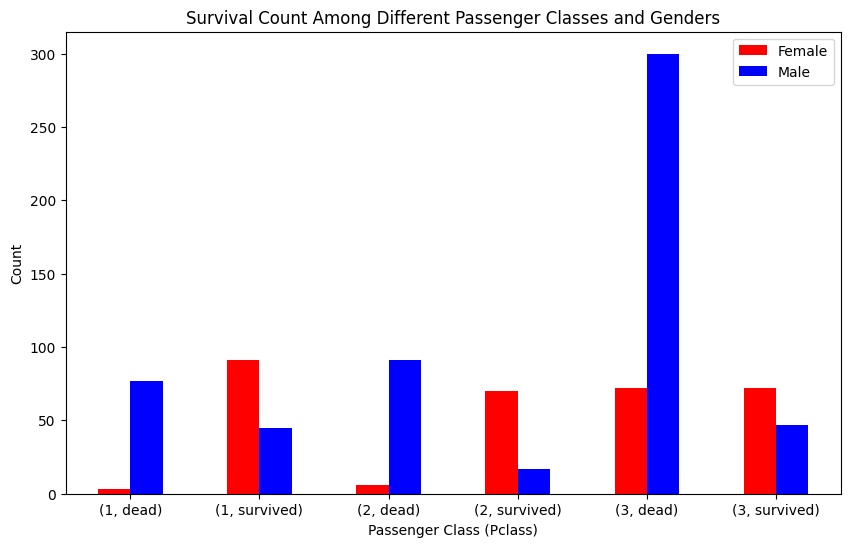

In [10]:

grouped_data = titanic_df.groupby(['Pclass', 'Survived', 'Sex']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar',  color=['red', 'blue'], figsize=(10,6))


plt.title('Survival Count Among Different Passenger Classes and Genders')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        '(1, dead)', '(1, survived)',
        '(2, dead)', '(2, survived)',
        '(3, dead)', '(3, survived)'
    ],
    rotation=0
)


plt.show()


In [11]:
def age_classification(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

# Apply the function to the 'Age' column and create 'AgeClass'
titanic_df['AgeClass'] = titanic_df['Age'].apply(age_classification)

# Display the updated DataFrame
titanic_df[['Age', 'AgeClass']].head()

,Age,AgeClass
0,22.0,1
1,38.0,3
2,26.0,1
3,35.0,2
4,35.0,2


In [12]:
titanic_df = titanic_df.drop('Age', axis=1)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survival_status,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Dead,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Survived,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Survived,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,Dead,2


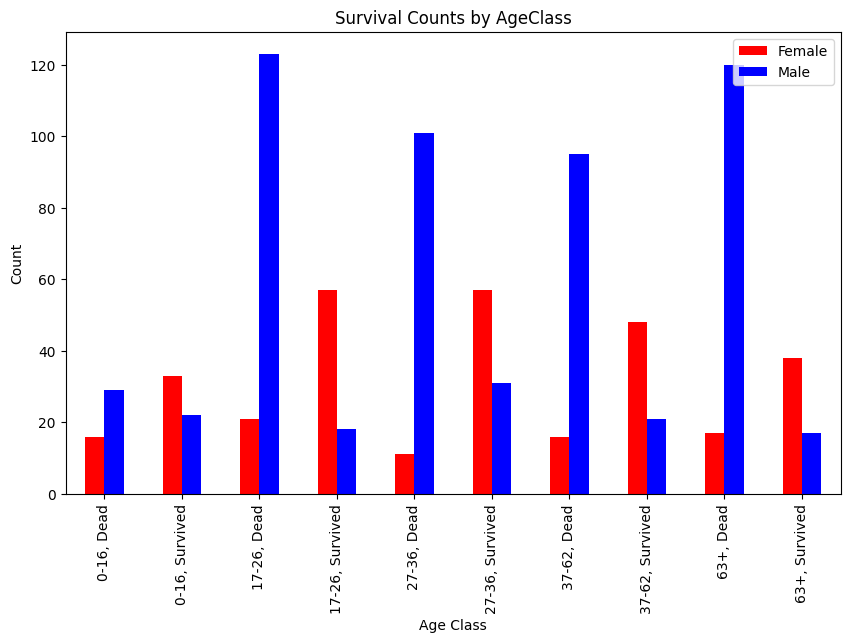

In [20]:
# graph by ageclass

survivedbyage = titanic_df.groupby(['AgeClass', 'Survived', 'Sex']).size().unstack()

survivedbyage.plot(kind='bar', color=['red', 'blue'], figsize=(10,6))

plt.title('Survival Counts by AgeClass')
plt.xlabel('Age Class')
plt.ylabel('Count')
plt.legend(['Female', 'Male'], loc='upper right')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['0-16, Dead', '0-16, Survived', '17-26, Dead', '17-26, Survived', '27-36, Dead', '27-36, Survived', '37-62, Dead', '37-62, Survived', '63+, Dead', '63+, Survived'])


# Display the plot
plt.show()


In [ ]:
titanic_df['Number of Relatives'] = titanic_df['SibSp'] + titanic_df['Parch']

titanic_df[['SibSp', 'Parch', 'Number of Relatives']].head()

,SibSp,Parch,Number of Relatives
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
